<a href="https://colab.research.google.com/github/sks9699/Api/blob/master/model_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d sks9699/leaf-class

100% 6.56G/6.56G [01:06<00:00, 102MB/s]
100% 6.56G/6.56G [01:06<00:00, 105MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/leaf-class.zip','r')
zip_ref.extractall('/content/dataset')
zip_ref.close()

In [4]:
TRAIN_DIR = "./DATABASE"
ORG_DIR = "/content/dataset/dataset/train"
CLASS = ['Alstonia Scholaris',
         'Arjun',
         'Bael',
         'Basil',
         'Chinar',
         'Gauva',
         'Jamun',
         'Jatropha',
         'Lemon',
         'Mango',
         'Pomegranate',
         'Pongamia Pinnata']

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications import Xception
from keras.applications.xception import preprocess_input
from keras.preprocessing.image  import ImageDataGenerator,load_img,img_to_array
import keras

In [13]:
base_model = Xception(input_shape=(256,256,3),include_top=False)

83683744/83683744 [==============================] - 1s 0us/step


In [14]:
for layers in base_model.layers:
  layers.trainable =False

In [17]:
x = Flatten()(base_model.output)
x = Dense(units=12,activation='softmax')(x)
model = Model(base_model.input,x)
model.compile(optimizer='adam',loss = keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 127, 127, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 127, 127, 32)         0         ['block1_conv1_bn[0][0]'

In [18]:
train_datgen = ImageDataGenerator(featurewise_center=True,
                                  rotation_range=0.4,
                                  width_shift_range=0.3,
                                  horizontal_flip=True,
                                  preprocessing_function=preprocess_input,
                                  zoom_range=0.4,
                                  shear_range=0.4)
train_data = train_datgen.flow_from_directory(directory='/content/dataset/dataset/train',
                                              target_size=(256,256),
                                              batch_size=36)

Found 3146 images belonging to 12 classes.


In [19]:
train_data.class_indices

swapped_dict = {v: k for k, v in train_data.class_indices.items()}
swapped_dict

{0: 'Alstonia Scholaris (P2)',
 1: 'Arjun (P1)',
 2: 'Bael (P4)',
 3: 'Basil (P8)',
 4: 'Chinar (P11)',
 5: 'Gauva (P3)',
 6: 'Jamun (P5)',
 7: 'Jatropha (P6)',
 8: 'Lemon (P10)',
 9: 'Mango (P0)',
 10: 'Pomegranate (P9)',
 11: 'Pongamia Pinnata (P7)'}

In [20]:
t_img,label = train_data.next()

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [21]:
t_img.shape

(36, 256, 256, 3)

In [22]:
def plotImage(img_arr,label):
  for idx,img in enumerate (img_arr):
      if idx<=10:
        plt.figure(figsize=(5,5))
        plt.imshow(img)
        plt.title(img.shape)
        plt.axis=False
        plt.show

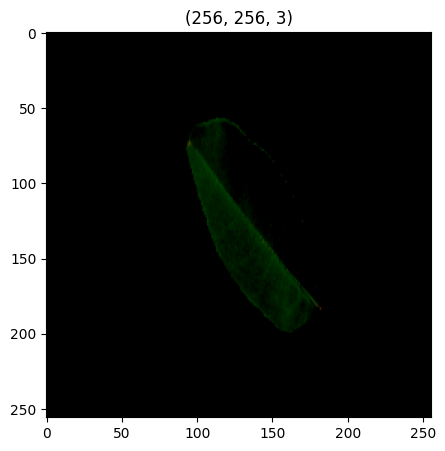

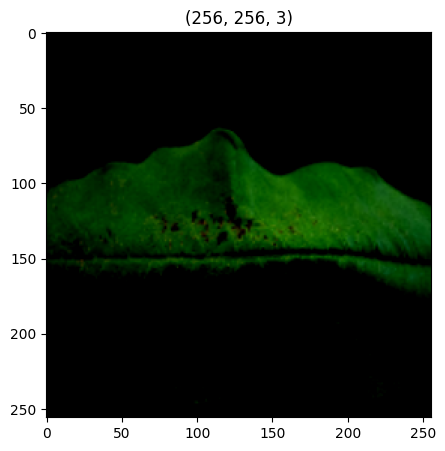

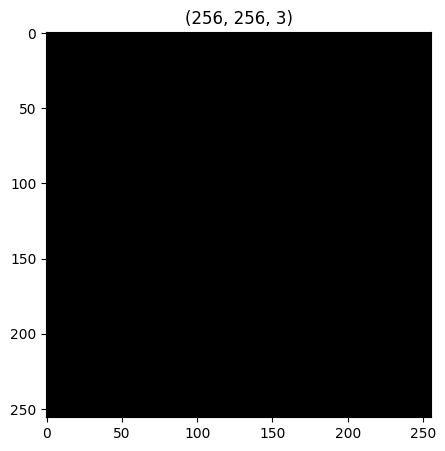

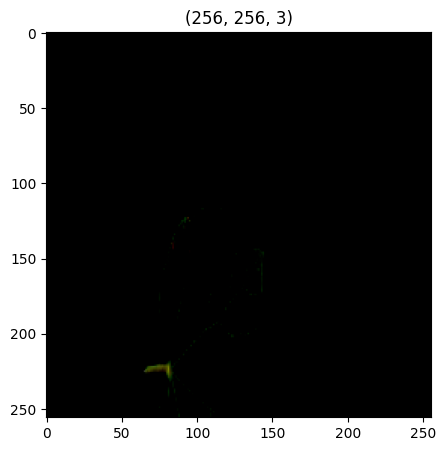

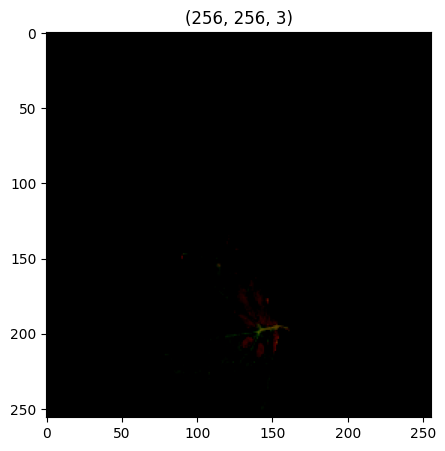

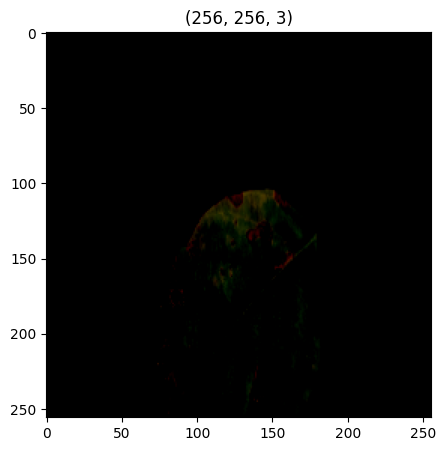

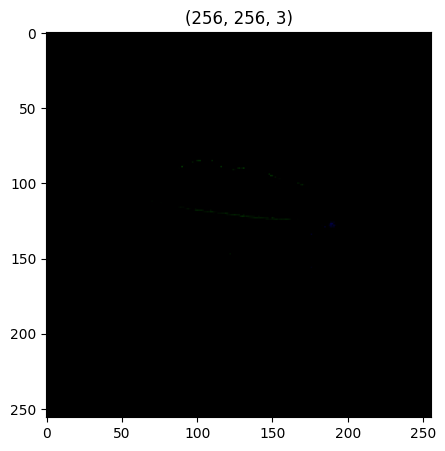

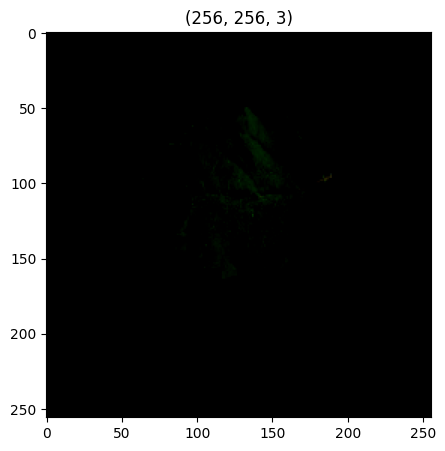

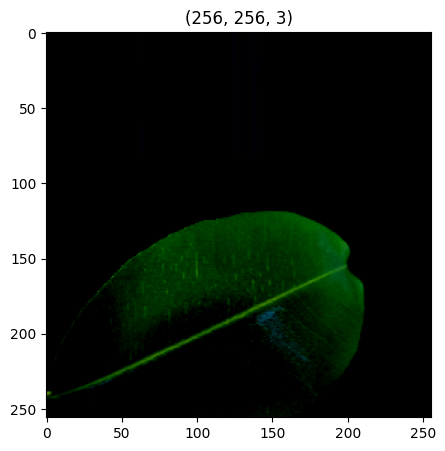

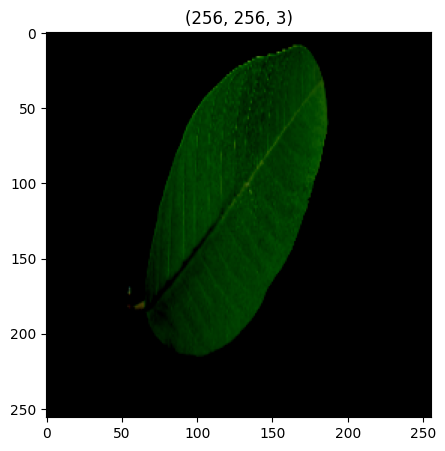

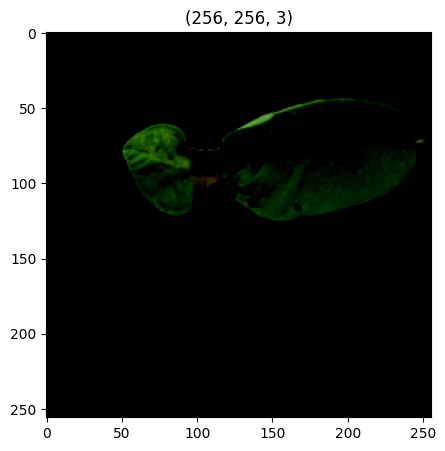

In [23]:
plotImage(t_img,label)

In [24]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
mc = ModelCheckpoint(filepath="./best_model.h5",
                     monitor='accuracy',
                     verbose=1,
                     save_best_only=True)
es = EarlyStopping(monitor='accuracy',min_delta=0.01,
                   patience=5,
                   verbose=1)
cb = [mc,es]

In [25]:
his = model.fit_generator(train_data,steps_per_epoch=10,
                          epochs=25,
                          callbacks=cb)

<ipython-input-25-8bc4c5458719>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train_data,steps_per_epoch=10,
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/25
10/10 [==============================] - ETA: 0s - loss: 8.7872 - accuracy: 0.3314 
Epoch 1: accuracy improved from -inf to 0.33136, saving model to ./best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 166s 15s/step - loss: 8.7872 - accuracy: 0.3314
Epoch 2/25
10/10 [==============================] - ETA: 0s - loss: 4.7848 - accuracy: 0.5278 
Epoch 2: accuracy improved from 0.33136 to 0.52778, saving model to ./best_model.h5
10/10 [==============================] - 163s 16s/step - loss: 4.7848 - accuracy: 0.5278
Epoch 3/25
10/10 [==============================] - ETA: 0s - loss: 3.5175 - accuracy: 0.6500 
Epoch 3: accuracy improved from 0.52778 to 0.65000, saving model to ./best_model.h5
10/10 [==============================] - 168s 16s/step - loss: 3.5175 - accuracy: 0.6500
Epoch 4/25
10/10 [==============================] - ETA: 0s - loss: 2.6684 - accuracy: 0.7000 
Epoch 4: accuracy improved from 0.65000 to 0.70000, saving model to ./best_model.h5
10/10 [==============================] - 162s 16s/step - loss: 2.6684 - accuracy: 0.7000
Epoch 5/25
10/10 [==============================] - ETA: 0s - loss: 2.4368 - accuracy: 0.7083 
Epoch 5: acc

In [26]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy'])

In [27]:
from keras.models import load_model
model = load_model("/content/best_model.h5")

<ipython-input-28-6e0a46cad583>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(h['accuracy'], 'go--', color='blue', label='Accuracy')


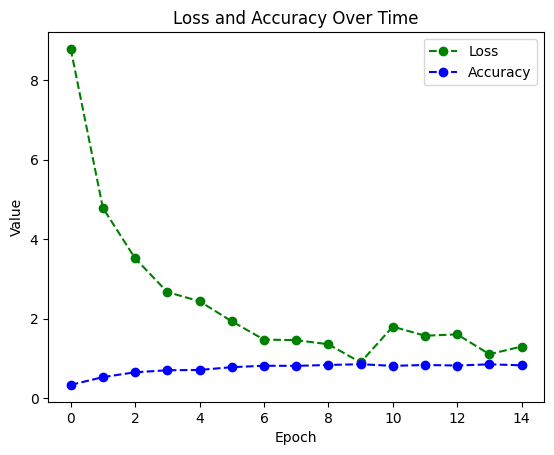

In [28]:
plt.plot(h['loss'], 'go--', label='Loss')
plt.plot(h['accuracy'], 'go--', color='blue', label='Accuracy')
plt.title("Loss and Accuracy Over Time")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.show()

In [29]:
max_accuracy_index = h['accuracy'].index(max(h['accuracy']))
max_accuracy = h['accuracy'][max_accuracy_index]
print("The accuracy of the Model is:",max_accuracy*100)

The accuracy of the Model is: 85.27777791023254


In [30]:
path = "/content/dataset/dataset/test/Jamun (P5)/0005_0028.JPG"
img = load_img(path,target_size = (256,256))
i = img_to_array(img)
im = preprocess_input(i)
img = np.expand_dims(im,axis=0)
pred =np.argmax( model.predict(img))
print("The Image Belong to: ",swapped_dict[pred])

1/1 [==============================] - 3s 3s/step
The Image Belong to:  Jamun (P5)


1/1 [==============================] - 1s 615ms/step
The Image Belong to:  Pongamia Pinnata (P7)
